## Test PYWAVAN on Taurus

In [3]:
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
gHDU = fits.open("/Users/robitaij/postdoc/Guillet/scale_free_IQU.fits")
scale_free = gHDU[0].data[0,:,:]

cHDU = fits.open("/Users/robitaij/postdoc/Guillet/filaments_IQU.fits")
filaments = cHDU[0].data[0,:,:]

filename = "/Users/robitaij/postdoc/Guillet/Taurus_l172_b-15_10degx10deg.fits"
npix=144
orig, hdr = fits.getdata(filename, 1, header=True)
origi=np.reshape(orig.I,(npix,npix))
moyenne = np.mean(origi)

Mean values= -6.758243938653936e-06 6.758243938714963e-06


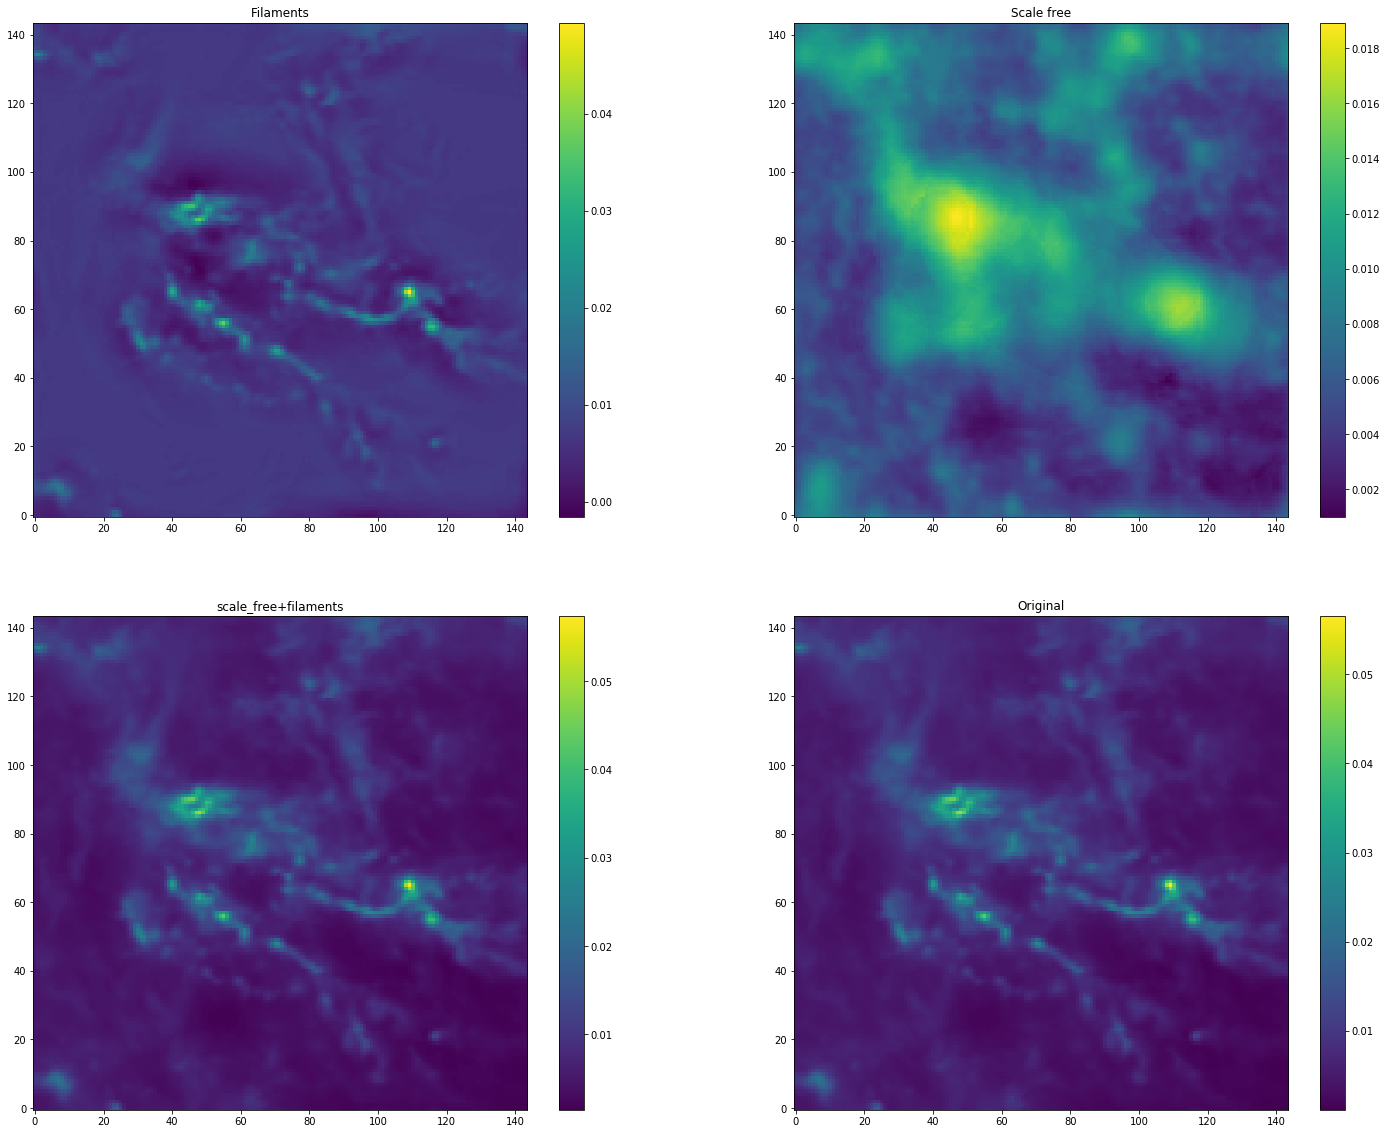

In [51]:
figure(figsize=(25,20))
plt.subplot(2,2,1)
imshow(filaments+moyenne,origin='lower')
title('Filaments')
colorbar()
plt.subplot(2,2,2)
imshow(scale_free+moyenne,origin='lower')
title('Scale free')
colorbar()
plt.subplot(2,2,3)
imshow(scale_free+filaments+moyenne,origin='lower')
title('scale_free+filaments')
colorbar()
plt.subplot(2,2,4)
imshow(origi,origin='lower')
title('Original')
colorbar()

print('Mean values=',np.mean(filaments),np.mean(scale_free))

### Correlation between original I and reconstruction

sigma= 0.0003173040799222174
coef[1] 7.162370470588301e-06


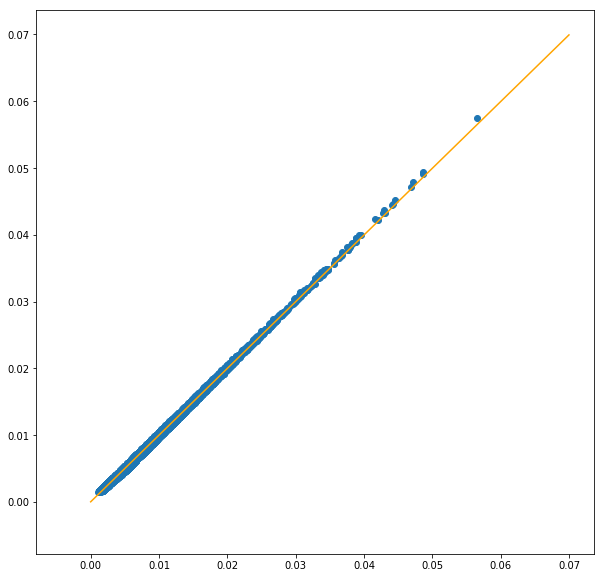

In [49]:
rec = filaments+scale_free+moyenne

figure(figsize=(10,10))
scatter(origi, rec)

coef,cov = np.polyfit(np.reshape(origi,npix**2),np.reshape(rec,npix**2),deg=1,cov=True)
xfit = np.linspace(0.,0.07,10)
yfit = coef[0]*xfit + coef[1]

plot(xfit,yfit,color='orange')

sigma = np.sqrt(np.diag(cov)[0])
print('sigma=',sigma)
print('coef[1]',coef[1])

Voici un petit test que j'ai fait à partir de la carte Stokes I seulement. L'algorithme est basé sur des transformées en ondelette continues et non-orthogonales. Ce choix a de multiples avantages pour l'analyse des coefficients et l'étude du spectre de puissance, mais ne permet pas d'avoir une reconstruction parfaite. Cependant, comme l'analyse de corrélation le démontre plus haut, cette reconstruction est en général assez fidèle. Malheureusement, en raison du traitement multi-échelle, une évaluation détaillée de la propagation d'erreur est plutôt difficile. À voir, mais l'ajout d'un padding et apodisation peut potentiellement améliorer la reconstruction. Ces keywords sont disponibles dans la fonction fan_trans().

Concernant les valeurs négatives, c'est une conséquence directe du traitement en ondelette. Une analyse en ondelette mesure la fluctuation locale d'un signal à une échelle donnée. Ceci peut être considéré comme un sigma local. La reconstruction étant basée sur les coefficients en ondelette seul, la fréquence zéro, c'est-à-dire la moyenne de l'image, est toujours manquante.

Comme tu peux le voir dans le code plus haut, cette moyenne peut être récupée sur l'image initiale et ensuite ajouté à la reconstruction. Étant donné que la séparation de la portion "scale free" et des structures "cohérentes" se fait en passant par un filtrage dans le même plan de Fourier, soit la transformée de Fourier de l'image initiale lors de la convolution avec la fonction en ondelette, cette même moyenne peut également être ajoutée à la portion scale free et cohérente. Cette opération est même particulièrement importante sur les paramètre de Stokes Q et U avant le calcul du degré de polarisation.